In [10]:
#low pass spatial filtering
import cv2
import numpy as np
img=cv2.imread("D:\\IMAGES\\fort.jpg",0)
m,n=img.shape
mask=np.ones([3,3],dtype=int)
mask=mask/9
img_new=np.zeros([m,n])
for i in range(1,m-1):
    for j in range(1,n-1):
        temp=img[i-1,j-1]*mask[0,0]+img[i-1,j]*mask[0,1]+img[i-1,j+1]*mask[0,2]+img[i,j-1]*mask[1,0]+img[i,j]*mask[1,1]+img[i,j+1]*mask[1,2]+img[i+1,j-1]*mask[2,0]+img[i+1,j]*mask[2,1]+img[i+1,j+1]*mask[2,2]
        img_new[i,j]=temp
img_new=img_new.astype(np.uint8)
cv2.imwrite('Blurred.tif',img_new)
cv2.imshow("Original image",img)
cv2.imshow("Blurred image",img_new)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [11]:
#median spatial filtering
import cv2
import numpy as np
img_noisy=cv2.imread("D:\\IMAGES\\fort.jpg",0)
m,n=img.shape
img_new1=np.zeros([m,n])
for i in range(1,m-1):
    for j in range(1,n-1):
        temp=[img_noisy[i-1,j-1],
              img_noisy[i-1,j],
              img_noisy[i-1,j+1],
              img_noisy[i,j-1],
              img_noisy[i,j],
              img_noisy[i,j+1],
              img_noisy[i+1,j-1],
              img_noisy[i+1,j],
              img_noisy[i+1,j+1]]
        temp=sorted(temp)
        img_new1[i,j]=temp[4]
img_new1=img_new1.astype(np.uint8)
cv2.imwrite("New_median_filtered.png",img_new1)
cv2.imshow("Original image",img_noisy)
cv2.imshow("Blurred image",img_new1)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
#median filtering
import cv2
import numpy as np
img=cv2.imread("D:\\IMAGES\\fort.jpg",0)
height,width=img.shape
filter_img=np.zeros((height,width),dtype=np.uint8)
kernel_size=4
padding=kernel_size//2
for i in range(padding,height-padding):
    for j in range(padding,width-padding):
        neighborhood=img[i-padding:i+padding+1,j-padding:j+padding+1]
        median_val=np.median(neighborhood)
        filter_img[i,j]=int(median_val)
cv2.imshow("Original image",img)
cv2.imshow("Filtered image",filter_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [12]:
#mean filtering
import cv2
import numpy as np
img=cv2.imread("D:\\IMAGES\\fort.jpg",0)
height,width=img.shape
filter_img=np.zeros((height,width),dtype=np.uint8)
kernel_size=3
padding=kernel_size//2
for i in range(padding,height-padding):
    for j in range(padding,width-padding):
        nei=img[i-padding:i+padding+1,j-padding:j+padding+1]
        mean_val=np.mean(nei)
        filter_img[i,j]=mean_val
print(nei)
print(mean_val)        
cv2.imshow("Original image",img)
cv2.imshow("Filtered image",filter_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

[[51 44  4]
 [61 55  2]
 [43 43  0]]
33.666666666666664


In [13]:
#Canny edge
import cv2
import numpy as np
img=cv2.imread("D:\IMAGES\china.jpg",0)
blur_img=cv2.GaussianBlur(img,(5,5),0)
#Apply canny edge detection
edges=cv2.Canny(blur_img,threshold1=50,threshold2=50)
#Display the original image and canny edge detection result
cv2.imshow("Original image",img)
cv2.imshow("Canny edge detection",edges)
cv2.waitKey(0)
cv2.destroyAllWindows()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(<matplotlib.image.AxesImage at 0x2297469edd0>, Text(0.5, 1.0, 'sobel X & Y'))

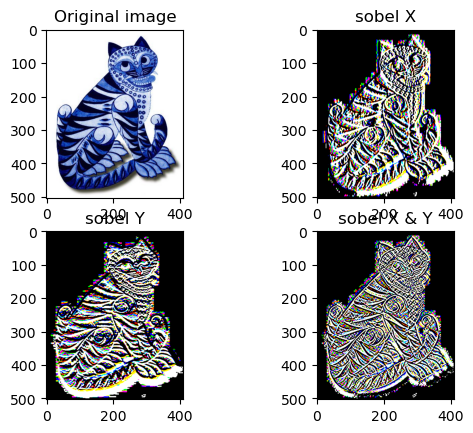

In [14]:
#sobel edge detection
import cv2
import matplotlib.pyplot as plt
img=cv2.imread("D:\IMAGES\J0099165.JPG")
#blur the image for better edge detection
img_blur=cv2.GaussianBlur(img,(3,3),0)
#sobel edge detection
sobelx=cv2.Sobel(src=img_blur,ddepth=cv2.CV_64F,dx=1,dy=0,ksize=5)
sobely=cv2.Sobel(src=img_blur,ddepth=cv2.CV_64F,dx=0,dy=1,ksize=5)
sobelxy=cv2.Sobel(src=img_blur,ddepth=cv2.CV_64F,dx=1,dy=1,ksize=5)
#display
plt.figure()
plt.subplot(2,2,1)
plt.imshow(img),plt.title("Original image")
plt.subplot(2,2,2)
plt.imshow(sobelx),plt.title("sobel X")
plt.subplot(2,2,3)
plt.imshow(sobely),plt.title("sobel Y")
plt.subplot(2,2,4)
plt.imshow(sobelxy),plt.title("sobel X & Y")


In [15]:
#prewitt edge detection
import cv2
import numpy as np
import matplotlib.pyplot as plt
img=cv2.imread("D:\IMAGES\china.jpg",0)
#blur the image for better edge detection
gaus=cv2.GaussianBlur(img,(5,5),0)
#kernel
kernelx=np.array([[1,1,1],[0,0,0],[-1,-1,-1]])
kernely=np.array([[-1,1,0],[-1,0,1],[-1,0,1]])
prewittx=cv2.filter2D(gaus,-1,kernelx)
prewitty=cv2.filter2D(gaus,-1,kernely)
cv2.imshow("Original image",img)
cv2.imshow("Prewitt x",prewittx)
cv2.imshow("Prewitt y",prewitty)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [16]:
#Laplacian
import cv2
img=cv2.imread("D:\IMAGES\china.jpg",0)
laplacian=cv2.Laplacian(img,cv2.CV_64F)
#conver the result into 8-bit image
laplacian_8bit=cv2.convertScaleAbs(laplacian)
#display
cv2.imshow("Original image",img)
cv2.imshow("Laplacian edge detection",laplacian_8bit)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [17]:
#local thresholding
import cv2
img=cv2.imread("D:\IMAGES\china.jpg",0)
#apply adaptive thresholding using opencv adaptive thershold function
thresholded_img=cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,11,2)
#save the thresholded image
cv2.imwrite("Thresholded_img.jpg",thresholded_img)
cv2.imshow("Original image",img)
cv2.imshow("Thresholded image",thresholded_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [18]:
#Global thresholding
import cv2
img=cv2.imread("D:\IMAGES\china.jpg",0)
#apply global thresholding using opencv thershold function
_,thresholded_img=cv2.threshold(img,128,255,cv2.THRESH_BINARY)
cv2.imshow("Original image",img)
cv2.imshow("Thresholded image",thresholded_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

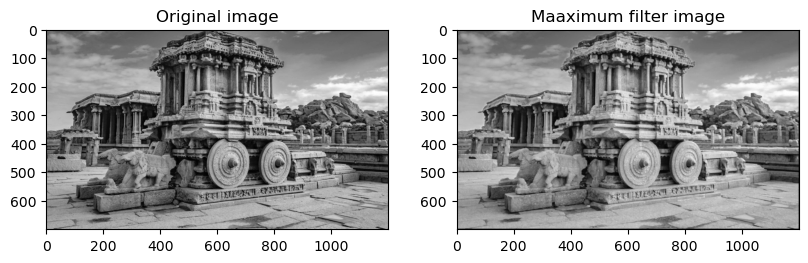

In [19]:
#maximum spatial filter
import cv2
import numpy as np
import matplotlib.pyplot as plt
img=cv2.imread("D:\IMAGES\hampi.jpg",0)
row,col=img.shape
img_filter=np.zeros((row,col),dtype=np.uint8)
for i in range(1,row-1):
    for j in range(1,col-1):
        neighbors=[]
        for p in [-1,0,1]:
            for q in [-1,0,1]:
                neighbors.append(img[i+p][j+q])
        img_filter[i][j]=max(neighbors)        
plt.figure(figsize=(15,5))
plt.subplot(131)
plt.title("Original image")
plt.imshow(img,cmap='gray')
plt.subplot(132)
plt.title("Maaximum filter image")
plt.imshow(img_filter,cmap='gray')       

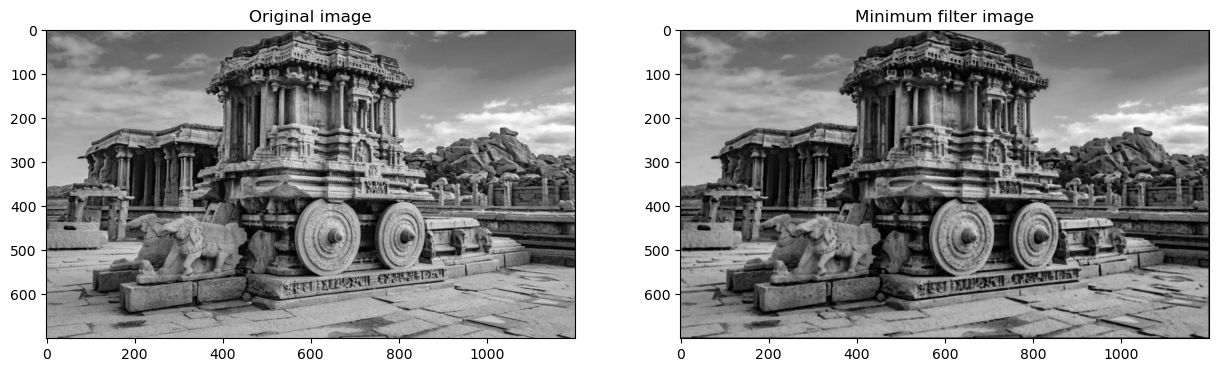

In [20]:
#Minimum spatial filter
import cv2
import numpy as np
import matplotlib.pyplot as plt
img=cv2.imread("D:\IMAGES\hampi.jpg",0)
row,col=img.shape
img_filter=np.zeros((row,col),dtype=np.uint8)
for i in range(1,row-1):
    for j in range(1,col-1):
        neighbors=[]
        for p in [-1,0,1]:
            for q in [-1,0,1]:
                neighbors.append(img[i+p][j+q])
        img_filter[i][j]=min(neighbors)        
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.title("Original image")
plt.imshow(img,cmap='gray')
plt.subplot(122)
plt.title("Minimum filter image")
plt.imshow(img_filter,cmap='gray')       

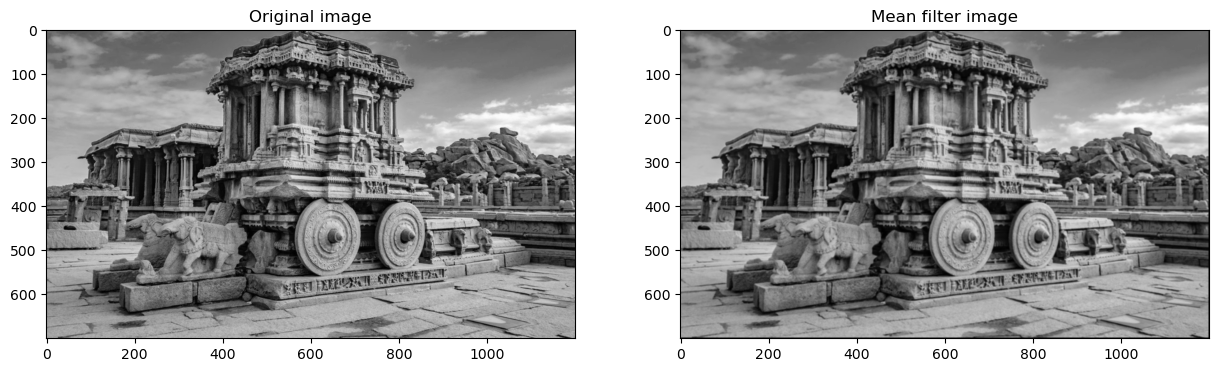

In [21]:
#Mean spatial filter
import cv2
import numpy as np
import matplotlib.pyplot as plt
img=cv2.imread("D:\IMAGES\hampi.jpg",0)
row,col=img.shape
mask=np.ones([3,3],dtype=int)
mask=mask/9
img_filter=np.zeros([row,col],np.uint8)
for i in range(1,row-1):
    for j in range(1,col-1):
        temp=0
        for p in [-1,0,1]:
            for q in [-1,0,1]:
                temp=temp+(img[i+p,j+q]*mask[p+1,q+1])
        img_filter[i][j]=temp        
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.title("Original image")
plt.imshow(img,cmap='gray')
plt.subplot(122)
plt.title("Mean filter image")
plt.imshow(img_filter,cmap='gray')

In [22]:
pip install mahotas

Note: you may need to restart the kernel to use updated packages.


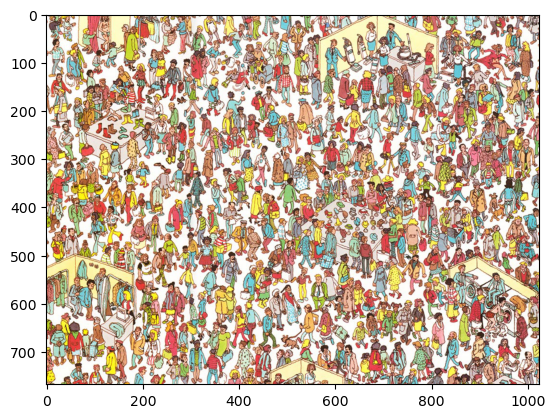

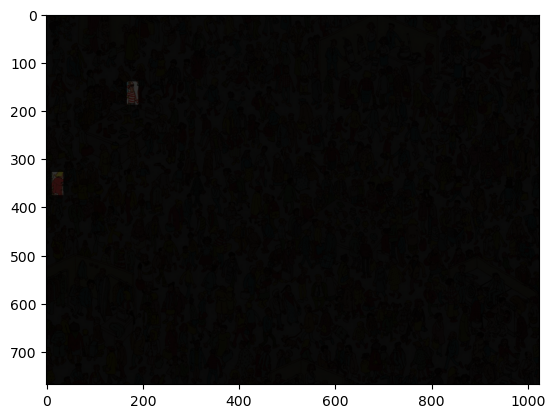

In [23]:
#Using library mahotas
from pylab import imshow,show
import mahotas
import mahotas.demos
import numpy as np
wally=mahotas.demos.load('Wally')
wfloat=wally.astype(float)
imshow(wally)
show()
r,g,b=wfloat.transpose((2,0,1))
w=wfloat.mean(2)
pattern=np.ones((24,16),float)
for i in range(2):
    pattern[i::4]=-1
    v=mahotas.convolve(r-w,pattern)
    mask=(v==v.max())
    mask=mahotas.dilate(mask,np.ones((48,24)))
    np.subtract(wally,.8*wally*~mask[:,:,None],out=wally,casting='unsafe')
imshow(wally)
show()

In [24]:
!apt-get install python-pgmagick

'apt-get' is not recognized as an internal or external command,
operable program or batch file.


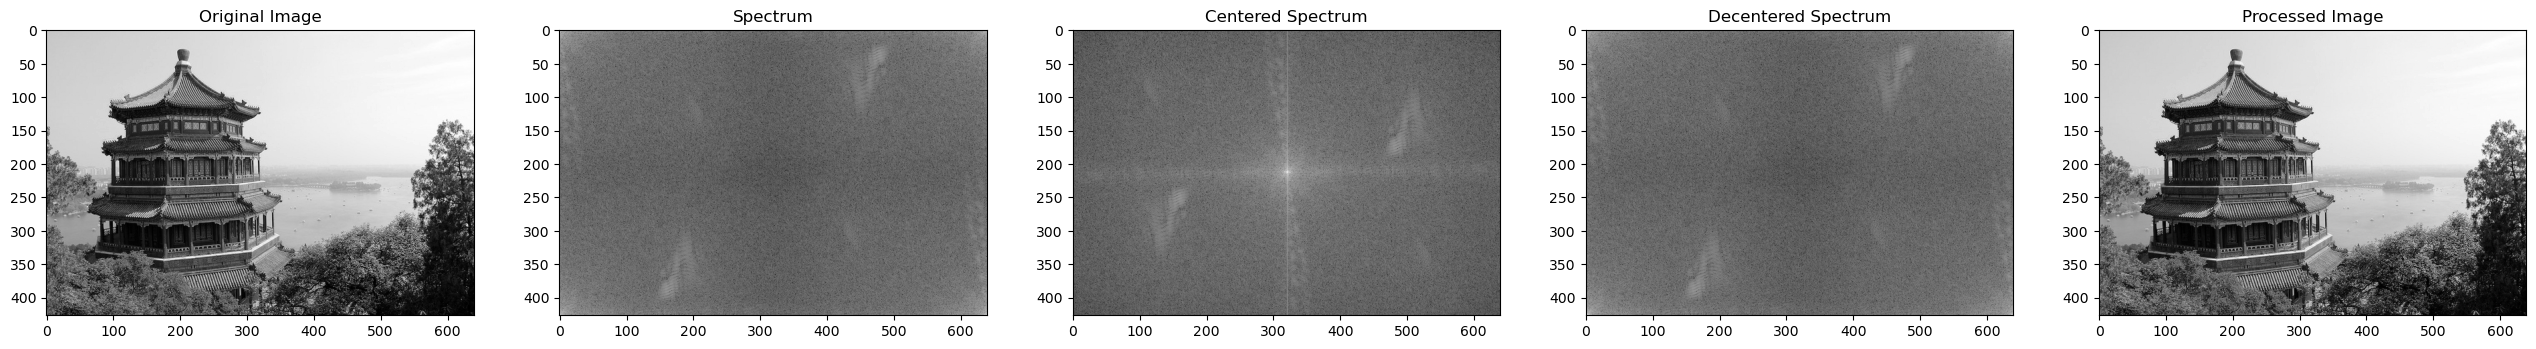

In [25]:
#Image enhancement in frequency domain-fourier trnasform
import cv2
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt,exp
plt.figure(figsize=(6.4*5,4.8*5),constrained_layout=False)
img=cv2.imread("D:\IMAGES\china.jpg",0)
plt.subplot(151),plt.imshow(img,"gray"),plt.title("Original Image")
original=np.fft.fft2(img)
plt.subplot(152),plt.imshow(np.log(1+np.abs(original)),"gray"),plt.title("Spectrum")
center=np.fft.fftshift(original)
plt.subplot(153),plt.imshow(np.log(1+np.abs(center)),"gray"),plt.title("Centered Spectrum")
inv_center=np.fft.fftshift(center)
plt.subplot(154),plt.imshow(np.log(1+np.abs(inv_center)),"gray"),plt.title("Decentered Spectrum")
processed_img=np.fft.ifft2(inv_center)
plt.subplot(155),plt.imshow(np.abs(processed_img),"gray"),plt.title("Processed Image")
plt.show()

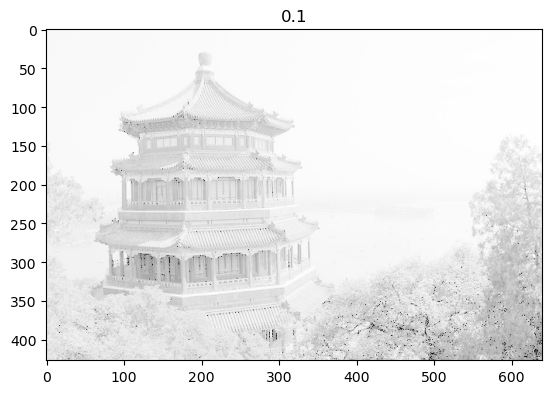

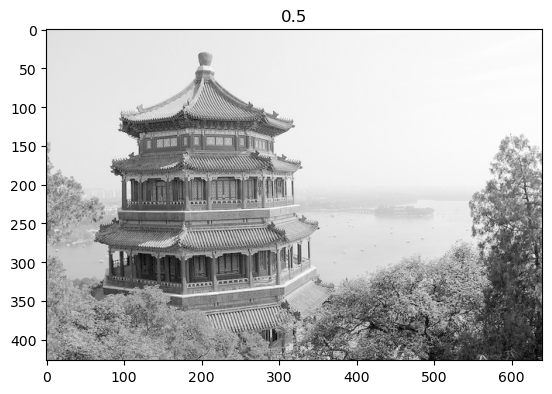

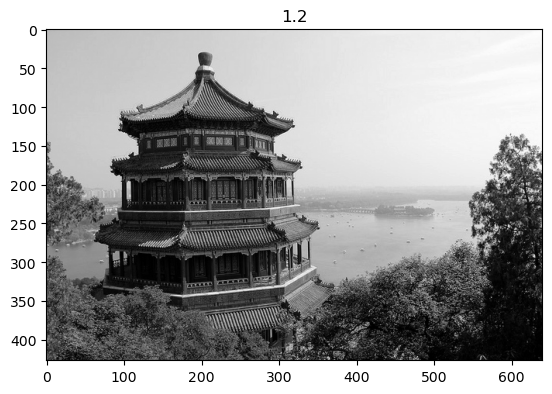

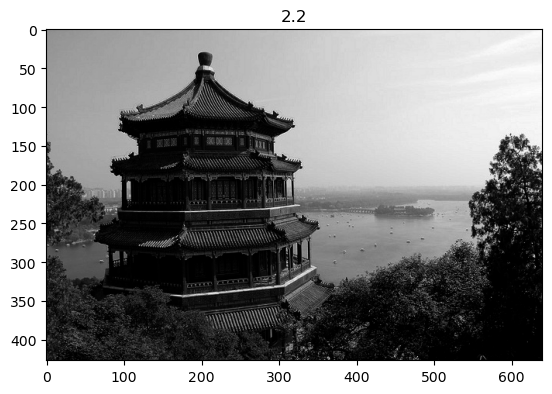

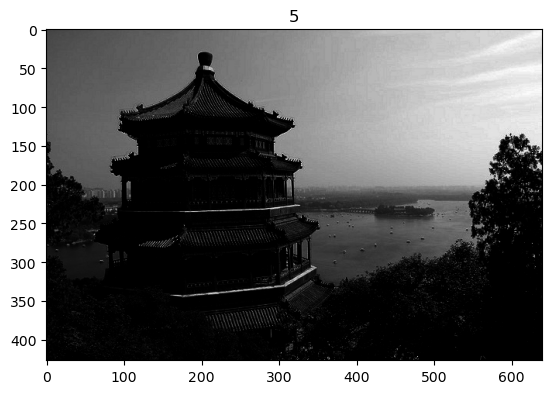

In [26]:
#Gamma Correction
import cv2
import numpy as np
import matplotlib.pyplot as plt
img=cv2.imread("D:\IMAGES\china.jpg",0)
#trying 5 gmama values
for gamma in[0.1,0.5,1.2,2.2,5]:
    #apply gamma correction
    gamma_corrected=np.array((255*((img/255)**gamma)),dtype='uint8')
    plt.subplot()
    plt.imshow(cv2.cvtColor(gamma_corrected,cv2.COLOR_BGR2RGB))
    plt.title(gamma)
    plt.show()

In [28]:
#Obtain edge image without standard function
import cv2
import numpy as np
from math import sqrt,exp
img=cv2.imread("D:\IMAGES\china.jpg",0)
height,width=img.shape
edge_image=np.zeros_like(img)

#Approximate gradients by calculating differences between adjacent pixels
for i in range(1,height-1):
    for j in range(1,width-1):
        #Compute differences between adjacent pixels x and y direction
        dx=int(img[i,j+1])-int(img[i,j-1])
        dy=int(img[i+1,j])-int(img[i-1,j])
        
        #Gradient magnitude
        edge_image[i,j]=min(255,np.sqrt(dx**2+dy**2))

cv2.imshow("Original Image",img)
cv2.imshow("Edge Image",edge_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

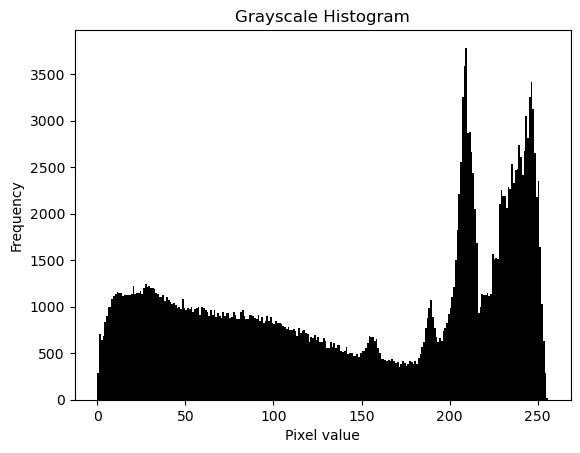

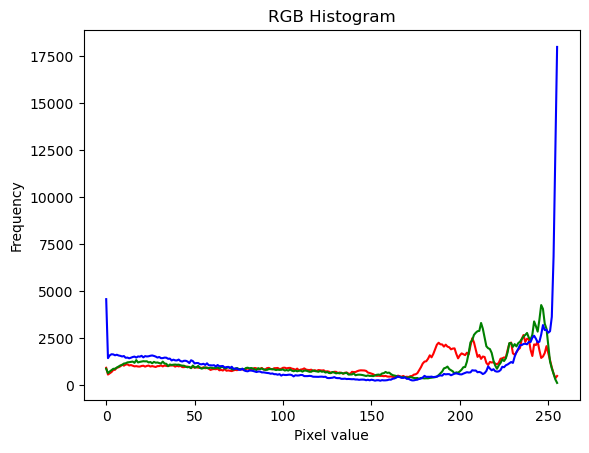

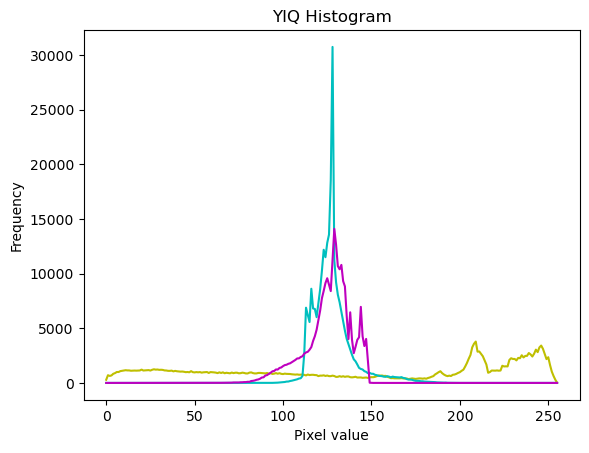

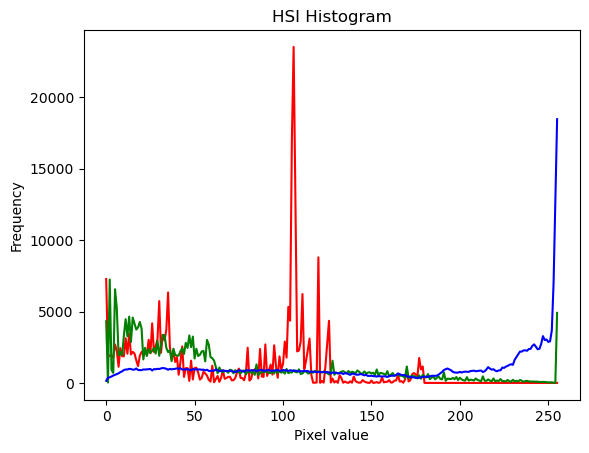

In [29]:
#Histogram of three components- RGB,YIQ,HSI
import cv2
import numpy as np
import matplotlib.pyplot as plt
img=cv2.imread("D:\IMAGES\china.jpg")

#Convert to Grayscale and plot histogram
gray_image=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
plt.hist(gray_image.ravel(),256,[0,256],color='black')
plt.title("Grayscale Histogram")
plt.xlabel("Pixel value")
plt.ylabel("Frequency")
plt.show()

#Convert to RGB and plot histogram
rgb_image=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
colors=("r","g","b")
plt.figure()
for i,col in enumerate(colors):
    hist=cv2.calcHist([rgb_image],[i],None,[256],[0,256])
    plt.plot(hist,color=col)
plt.title("RGB Histogram")
plt.xlabel("Pixel value")
plt.ylabel("Frequency")
plt.show()

#Convert to YIQ and plot histogram
yiq_image=cv2.cvtColor(img,cv2.COLOR_BGR2YCrCb)
colors=("y","c","m")
plt.figure()
for i,col in enumerate(colors):
    hist=cv2.calcHist([yiq_image],[i],None,[256],[0,256])
    plt.plot(hist,color=col)
plt.title("YIQ Histogram")
plt.xlabel("Pixel value")
plt.ylabel("Frequency")
plt.show()

#Convert to HSI and plot histogram
hsv_image=cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
colors=("r","g","b")
plt.figure()
for i,col in enumerate(colors):
    hist=cv2.calcHist([hsv_image],[i],None,[256],[0,256])
    plt.plot(hist,color=col)
plt.title("HSI Histogram")
plt.xlabel("Pixel value")
plt.ylabel("Frequency")
plt.show()

In [ ]:
#Edge detetion - Prewitt, Sobel, Laplacian

import cv2
import numpy as np
import matplotlib.pyplot as plt
img=cv2.imread("D:\\IMAGES\\fort.jpg",0)
#blur the image for better edge detection
img_blur=cv2.GaussianBlur(img,(3,3),0)

#sobel edge detection
sobelx=cv2.Sobel(src=img_blur,ddepth=cv2.CV_64F,dx=1,dy=0,ksize=5)
sobely=cv2.Sobel(src=img_blur,ddepth=cv2.CV_64F,dx=0,dy=1,ksize=5)
sobelxy=cv2.Sobel(src=img_blur,ddepth=cv2.CV_64F,dx=1,dy=1,ksize=5)
#display
plt.figure()
plt.subplot(2,2,1)
plt.imshow(img),plt.title("Original image")
plt.subplot(2,2,2)
plt.imshow(sobelx),plt.title("sobel X")
plt.subplot(2,2,3)
plt.imshow(sobely),plt.title("sobel Y")
plt.subplot(2,2,4)
plt.imshow(sobelxy),plt.title("sobel X & Y")

#Prewitt edge detection-kernel
kernelx=np.array([[1,1,1],[0,0,0],[-1,-1,-1]])
kernely=np.array([[-1,1,0],[-1,0,1],[-1,0,1]])
prewittx=cv2.filter2D(img_blur,-1,kernelx)
prewitty=cv2.filter2D(img_blur,-1,kernely)
cv2.imshow("Original image",img)
cv2.imshow("Prewitt x",prewittx)
cv2.imshow("Prewitt y",prewitty)

#Laplacian
laplacian=cv2.Laplacian(img,cv2.CV_64F)
#conver the result into 8-bit image
laplacian_8bit=cv2.convertScaleAbs(laplacian)
#display
cv2.imshow("Laplacian edge detection",laplacian_8bit)
cv2.waitKey(0)
cv2.destroyAllWindows()

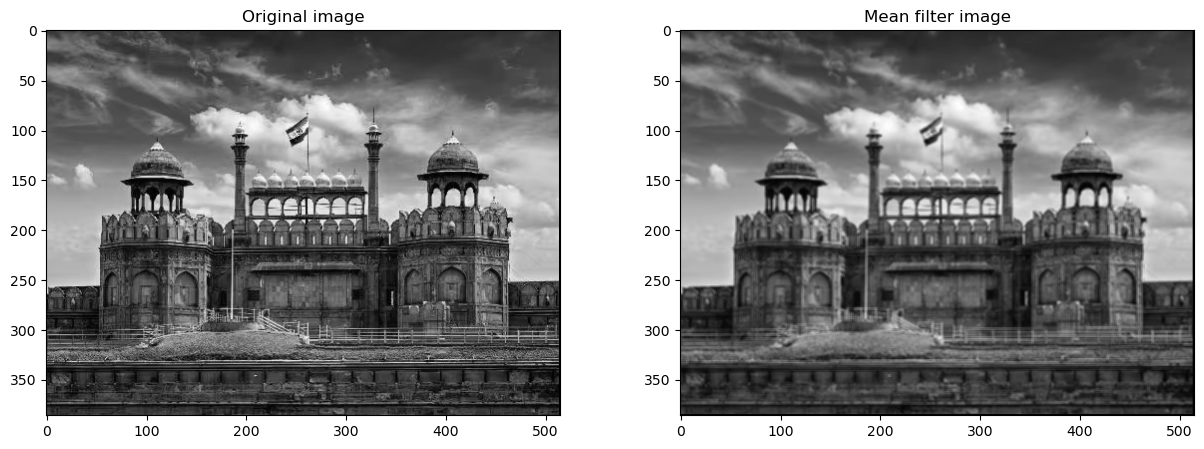

In [30]:
#Image smoothing - median filtering,mean spatial filtering

#median filtering
import cv2
import numpy as np
img=cv2.imread("D:\\IMAGES\\fort.jpg",0)
height,width=img.shape
filter_img=np.zeros((height,width),dtype=np.uint8)
kernel_size=4
padding=kernel_size//2
for i in range(padding,height-padding):
    for j in range(padding,width-padding):
        neighborhood=img[i-padding:i+padding+1,j-padding:j+padding+1]
        median_val=np.median(neighborhood)
        filter_img[i,j]=int(median_val)
cv2.imshow("Original image",img)
cv2.imshow("Filtered image",filter_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

#Mean spatial filter
row,col=img.shape
mask=np.ones([3,3],dtype=int)
mask=mask/9
img_filter=np.zeros([row,col],np.uint8)
for i in range(1,row-1):
    for j in range(1,col-1):
        temp=0
        for p in [-1,0,1]:
            for q in [-1,0,1]:
                temp=temp+(img[i+p,j+q]*mask[p+1,q+1])
        img_filter[i][j]=temp        
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.title("Original image")
plt.imshow(img,cmap='gray')
plt.subplot(122)
plt.title("Mean filter image")
plt.imshow(img_filter,cmap='gray')

In [ ]:
#Line detection using Houhline method
import cv2
import numpy as np
img=cv2.imread("D:\IMAGES\J0341455.JPG")
edges=cv2.Canny(img,75,150)
lines=cv2.HoughLinesP(edges,1,np.pi/180,30,maxLineGap=250)
for line in lines:
    x1,y1,x2,y2=line[0]
    cv2.line(img,(x1,y1),(x2,y2),(0,0,128),1)
cv2.imshow("LinesEdges",edges)
cv2.imshow("LinesDetected",img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
#Corner detection using Harries algorithm
import cv2
import numpy as np
img=cv2.imread("D:\IMAGES\J0341455.JPG")
operatedImage=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
operatedImage=np.float32(operatedImage)
dest=cv2.cornerHarris(operatedImage,2,5,0.07)
dest=cv2.dilate(dest,None)
img[dest>0.01*dest.max()]=[0,0,255]
cv2.imshow("Image with borders",img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
#Fourier transform 1D and 2D
import cv2
import numpy as np
import matplotlib.pyplot as plt
#2D Fourier transform
img=cv2.imread("D:\IMAGES\J0341455.JPG",0)

#1D Fourier transform
#Select a row from the image(middle row)
row_index=img.shape[0]//2
signal_1D=img[row_index,:]
#Compute 1D Fourier transform
fft_signal=np.fft.fft(signal_1D)
freq=np.fft.fftfreq(len(signal_1D))
mag_1D=np.abs(fft_signal)

#plot
plt.figure(figsize=(12,6))
plt.subplot(2,1,1)
plt.plot(signal_1D)
plt.title("Original signal")
plt.xlabel("Pixel position")
plt.ylabel("Intensity")

plt.subplot(2,1,2)
plt.stem(freq[:len(freq)//2],mag_1D[:len(mag_1D)//2],basefmt="")
plt.title("Magnitude of the Fourier transform ")
plt.xlabel("Frequency")
plt.ylabel("Magnitude")

plt.tight_layout()
plt.show()

In [ ]:
#SimpleITK and Mahotas
#Using library mahotas
from pylab import imshow,show
import mahotas
import mahotas.demos
import numpy as np
wally=mahotas.demos.load('Wally')
wfloat=wally.astype(float)
imshow(wally)
show()
r,g,b=wfloat.transpose((2,0,1))
w=wfloat.mean(2)
pattern=np.ones((24,16),float)
for i in range(2):
    pattern[i::4]=-1
    v=mahotas.convolve(r-w,pattern)
    mask=(v==v.max())
    mask=mahotas.dilate(mask,np.ones((48,24)))
    np.subtract(wally,.8*wally*~mask[:,:,None],out=wally,casting='unsafe')
imshow(wally)
show()

#Using library simpleITK
import SimpleITK as sitk
import cv2
img=sitk.ReadImage("D:\IMAGES\headnneck.jpg")
#Convert simpleITK image to a numpy array for openCV compatibility
img_array=sitk.GetArrayFromImage(img)
#Access specific slice from the image array
slice_index=2
img_slice=img_array[:,:,slice_index]
#Display the slice using openCV
cv2.imshow("Original image",img_array)
cv2.imshow("Medical image slice",img_slice)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
import numpy as np 
import os 
import cv2 
import matplotlib.pyplot as plt 

def Canny_detector(img, weak_th = None, strong_th = None): 

    # conversion of image to grayscale 
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 

    # Noise reduction step 
    img = cv2.GaussianBlur(img, (5, 5), 1.4) 

    # Calculating the gradients 
    gx = cv2.Sobel(np.float32(img), cv2.CV_64F, 1, 0, 3) 
    gy = cv2.Sobel(np.float32(img), cv2.CV_64F, 0, 1, 3) 

    # Conversion of Cartesian coordinates to polar 
    mag, ang = cv2.cartToPolar(gx, gy, angleInDegrees = True) 

    # setting the minimum and maximum thresholds for double thresholding 
    mag_max = np.max(mag) 
    if not weak_th:weak_th = mag_max * 0.1
    if not strong_th:strong_th = mag_max * 0.5

    # getting the dimensions of the input image 
    height, width = img.shape 

    # Looping through every pixel of the grayscale image 
    for i_x in range(width): 
        for i_y in range(height): 

            grad_ang = ang[i_y, i_x] 
            grad_ang = abs(grad_ang-180) if abs(grad_ang)>180 else abs(grad_ang) 

            # selecting the neighbours of the target pixel according to the gradient direction in the x axis direction 
            if grad_ang<= 22.5: 
                neighb_1_x, neighb_1_y = i_x-1, i_y 
                neighb_2_x, neighb_2_y = i_x + 1, i_y 

            # top right (diagonal-1) direction 
            elif grad_ang>22.5 and grad_ang<=(22.5 + 45): 
                neighb_1_x, neighb_1_y = i_x-1, i_y-1
                neighb_2_x, neighb_2_y = i_x + 1, i_y + 1

            # In y-axis direction 
            elif grad_ang>(22.5 + 45) and grad_ang<=(22.5 + 90): 
                    neighb_1_x, neighb_1_y = i_x, i_y-1
                    neighb_2_x, neighb_2_y = i_x, i_y + 1

            # top left (diagonal-2) direction 
            elif grad_ang>(22.5 + 90) and grad_ang<=(22.5 + 135): 
                neighb_1_x, neighb_1_y = i_x-1, i_y + 1
                neighb_2_x, neighb_2_y = i_x + 1, i_y-1

            # Now it restarts the cycle 
            elif grad_ang>(22.5 + 135) and grad_ang<=(22.5 + 180): 
                neighb_1_x, neighb_1_y = i_x-1, i_y 
                neighb_2_x, neighb_2_y = i_x + 1, i_y 

            # Non-maximum suppression step 
            if width>neighb_1_x>= 0 and height>neighb_1_y>= 0: 
                if mag[i_y, i_x]<mag[neighb_1_y, neighb_1_x]: 
                    mag[i_y, i_x]= 0
                    continue

            if width>neighb_2_x>= 0 and height>neighb_2_y>= 0: 
                if mag[i_y, i_x]<mag[neighb_2_y, neighb_2_x]: 
                    mag[i_y, i_x]= 0

    weak_ids = np.zeros_like(img) 
    strong_ids = np.zeros_like(img)
    ids = np.zeros_like(img) 

    # double thresholding step 
    for i_x in range(width): 
        for i_y in range(height): 

            grad_mag = mag[i_y, i_x] 

            if grad_mag<weak_th: 
                mag[i_y, i_x]= 0
            elif strong_th>grad_mag>= weak_th: 
                ids[i_y, i_x]= 1
            else: 
                ids[i_y, i_x]= 2


    # finally returning the magnitude of gradients of edges 
    return mag 

frame = cv2.imread("D:\IMAGES\Gojo.jpg") 

# calling the designed function for finding edges 
canny_img = Canny_detector(frame) 

# Displaying the input and output image 
plt.figure() 
f, plots = plt.subplots(2, 1) 
plots[0].imshow(frame) 
plots[1].imshow(canny_img) 

In [ ]:
#Sharpening and edge detection
import numpy as np 
import cv2 
import matplotlib.pyplot as plt 
fig=plt.figure(figsize=(15,8))
row=2
column=2
img=cv2.imread("D:\IMAGES\photo.jpg")
cv2.imshow("Original image",img)
cv2.waitKey(0)
cv2.destroyAllWindows()

#Sharpening the image using different kernels
sharpen_kernel=np.array([[0,-1,0],[-1,5,-1],[0,-1,0]])
edgedetection_kernel1=np.array([[0,-1,0],[-1,4,-1],[0,-1,0]])
edgedetection_kernel2=np.array([[-1,-1,-1],[-1,8,-1],[-1,-1,-1]])
identity_kernel1=np.array([[0,0,0],[0,1,0],[0,0,0]])

sharpen_image1=cv2.filter2D(src=img,ddepth=-1,kernel=sharpen_kernel)
edgedetected_image1=cv2.filter2D(src=img,ddepth=-1,kernel=edgedetection_kernel1)
edgedetected_image2=cv2.filter2D(src=img,ddepth=-1,kernel=edgedetection_kernel2)
identity_image1=cv2.filter2D(src=img,ddepth=-1,kernel=identity_kernel1)

fig.add_subplot(row,column,1)
plt.imshow(sharpen_image1)
plt.title("Sharpened image")

fig.add_subplot(row,column,2)
plt.imshow(edgedetected_image1)
plt.title("Edge detected image1")

fig.add_subplot(row,column,3)
plt.imshow(edgedetected_image2)
plt.title("Edge detected image2")

fig.add_subplot(row,column,4)
plt.imshow(identity_image1)
plt.title("Identity image")

In [ ]:
#Line and Corner detection
#Line detection using Houhline method
import cv2
import numpy as np
img=cv2.imread("D:\IMAGES\photo.jpg")
cv2.imshow("Original image",img)
edges=cv2.Canny(img,75,150)
lines=cv2.HoughLinesP(edges,1,np.pi/180,30,maxLineGap=250)
for line in lines:
    x1,y1,x2,y2=line[0]
    cv2.line(img,(x1,y1),(x2,y2),(0,0,128),1)
cv2.imshow("LinesEdges",edges)
cv2.imshow("LinesDetected",img)

#Corner detection using Harries algorithm
import cv2
import numpy as np
img=cv2.imread("D:\IMAGES\photo.jpg")
operatedImage=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
operatedImage=np.float32(operatedImage)
dest=cv2.cornerHarris(operatedImage,2,5,0.07)
dest=cv2.dilate(dest,None)
img[dest>0.01*dest.max()]=[0,0,255]
cv2.imshow("Image with borders",img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
#Image enhancement in frequency domain-fourier trnasform
#Fourier transform 2D
import cv2
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt,exp
plt.figure(figsize=(6.4*5,4.8*5),constrained_layout=False)
img=cv2.imread("D:\IMAGES\photo.jpg",0)
plt.subplot(151),plt.imshow(img,"gray"),plt.title("Original Image")
original=np.fft.fft2(img)
plt.subplot(152),plt.imshow(np.log(1+np.abs(original)),"gray"),plt.title("Spectrum")
center=np.fft.fftshift(original)
plt.subplot(153),plt.imshow(np.log(1+np.abs(center)),"gray"),plt.title("Centered Spectrum")
inv_center=np.fft.fftshift(center)
plt.subplot(154),plt.imshow(np.log(1+np.abs(inv_center)),"gray"),plt.title("Decentered Spectrum")
processed_img=np.fft.ifft2(inv_center)
plt.subplot(155),plt.imshow(np.abs(processed_img),"gray"),plt.title("Processed Image")
plt.show()

#Fourier transform 1D
import cv2
import numpy as np
import matplotlib.pyplot as plt
#2D Fourier transform
img=cv2.imread("D:\IMAGES\photo.jpg",0)

#1D Fourier transform
#Select a row from the image(middle row)
row_index=img.shape[0]//2
signal_1D=img[row_index,:]
#Compute 1D Fourier transform
fft_signal=np.fft.fft(signal_1D)
freq=np.fft.fftfreq(len(signal_1D))
mag_1D=np.abs(fft_signal)

#plot
plt.figure(figsize=(12,6))
plt.subplot(2,1,1)
plt.plot(signal_1D)
plt.title("Original signal")
plt.xlabel("Pixel position")
plt.ylabel("Intensity")

plt.subplot(2,1,2)
plt.stem(freq[:len(freq)//2],mag_1D[:len(mag_1D)//2],basefmt="")
plt.title("Magnitude of the Fourier transform ")
plt.xlabel("Frequency")
plt.ylabel("Magnitude")

plt.tight_layout()
plt.show()

In [ ]:
#Dinoising
import cv2
from skimage.restoration import denoise_tv_chambolle,denoise_bilateral
from skimage.util import random_noise
img=cv2.imread("D:\IMAGES\panda.jpg")
#Add noise to the image
noisy_img=random_noise(img)
denoised_img=denoise_tv_chambolle(noisy_img,multichannel=True)
denoised_img2=denoise_bilateral(img,multichannel=True)
cv2.imshow("Original image",img)
cv2.imshow("Noisy image",noisy_img)
cv2.imshow("Denoisy image",denoised_img)
cv2.imshow("Bilateral image",denoised_img2)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
#Blurring an image using blur and gaussianblur function
import cv2
img=img=cv2.imread("D:\IMAGES\panda.jpg")
blurImg=cv2.blur(img,(10,10))
blurred=cv2.GaussianBlur(img,(5,5),0)
cv2.imshow("Original image",img)
cv2.imshow("Blurred image",blurImg)
cv2.imshow("Gaussian Blurred image",blurred)
cv2.waitKey(0)
cv2.destroyAllWindows()

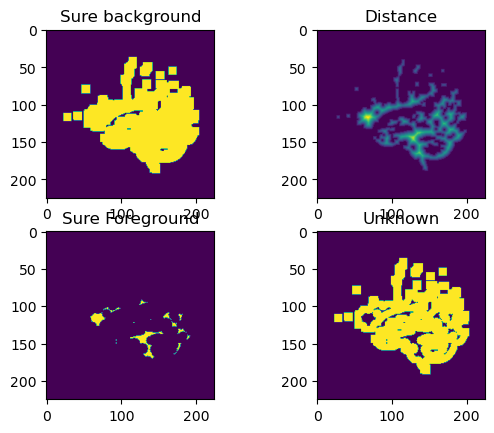

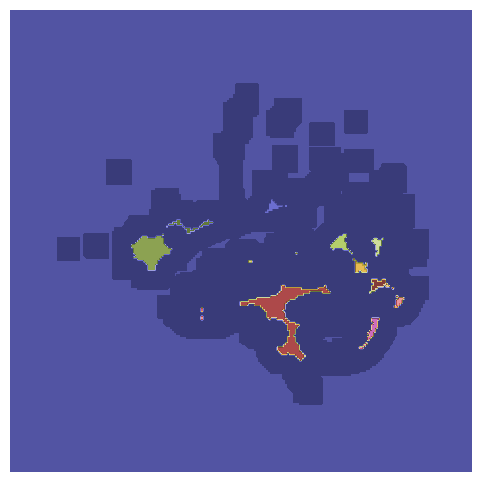

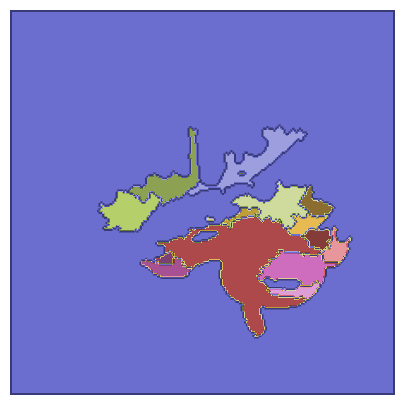

In [34]:
#Segmentation
import cv2
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image,display
img=cv2.imread("D:\IMAGES\images.jpeg")
cv2.imshow("Original",img)

gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
cv2.imshow("Gray",gray)

ret,bin_img=cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
cv2.imshow("Binary inverse",bin_img)

kernel=cv2.getStructuringElement(cv2.MORPH_RECT,(3,3))
bin_img=cv2.morphologyEx(bin_img,cv2.MORPH_OPEN,kernel,iterations=2)
cv2.imshow("Binary morph",bin_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

#fig,axes=plt.subplots(nrows=2,ncols=2,figsize=(8,8))

sure_bg=cv2.dilate(bin_img,kernel,iterations=3)
#imshow(sure_bg,axes[0,0])
#axes[0,0].set_title("Sure background")
plt.subplot(2,2,1)
plt.title("Sure background")
plt.imshow(sure_bg)

dist=cv2.distanceTransform(bin_img,cv2.DIST_L2,5)
plt.subplot(2,2,2)
plt.title("Distance")
plt.imshow(dist)
#imshow(dist,axes[0,1])
#axes[0,1].set_title("Distance transform")

ret,sure_fg=cv2.threshold(dist,0.5*dist.max(),255,cv2.THRESH_BINARY)
sure_fg=sure_fg.astype(np.uint8)
plt.subplot(2,2,3)
plt.title("Sure Foreground")
plt.imshow(sure_fg)
#imshow(sure_fg,axes[1,0])
#axes[1,0].set_title("Sure Foreground")

unknown=cv2.subtract(sure_bg,sure_fg)
plt.subplot(2,2,4)
plt.title("Unknown")
plt.imshow(unknown)
#imshow(unknown,axes[1,1])
#axes[1,1].set_title("Unknown")
plt.show()

ret,markers=cv2.connectedComponents(sure_fg)

markers+=1
markers[unknown==255]=0

fig,ax=plt.subplots(figsize=(6,6))
ax.imshow(markers,cmap="tab20b")
ax.axis("off")
plt.show()

markers=cv2.watershed(img,markers)

fig,ax=plt.subplots(figsize=(5,5))
ax.imshow(markers,cmap="tab20b")
ax.axis("off")
plt.show()

labels=np.unique(markers)
coins=[]
for label in labels[2:]:
    target=np.where(markers==label,255,0).astype(np.uint8)
    contours,heirarchy=cv2.findContours(target,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
    coins.append(contours[0])
img=cv2.drawContours(img,coins,-1,color=(0,23,223),thickness=2)
cv2.imshow("FInal image",img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
#Active contour
import numpy as np
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
from skimage import data
from skimage.filters import gaussian
from skimage.segmentation import active_contour

img=data.astronaut()

s=np.linspace(0,2*np.pi,400)
x=220+100*np.cos(s)
y=100+100*np.sin(s)
init=np.array([x,y]).T

cntr=active_contour(gaussian(img,3),init,alpha=0.015,beta=10,gamma=0.001)
fig,ax=plt.subplots(1,2,figsize=(7,7))
ax[0].imshow(img,cmap=plt.cm.gray)
ax[0].set_title("Original Image")

ax[1].imshow(img,cmap=plt.cm.gray)

ax[1].plot(init[:,0],init[:,1],'--r',lw=3)
ax[1].plot(cntr[:,0],cntr[:,1],'-b',lw=3)
ax[1].set_title("Active contour image")

(<Axes: >, <matplotlib.image.AxesImage at 0x2297afd2680>)

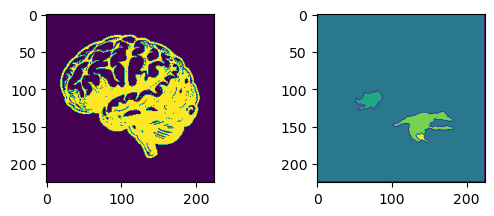

In [33]:
#Segmentation 2
import numpy as np
import matplotlib.pyplot as plt
import cv2

img=cv2.imread("D:\IMAGES\images.jpeg")
cv2.imshow("Original",img)

gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
cv2.imshow("Gray",gray)
cv2.waitKey(0)
cv2.destroyAllWindows()

ret,thresh=cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
plt.subplot(221),plt.imshow(thresh)
kernel=np.ones((3,3),np.uint8)
opening=cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel,iterations=2)
sure_bg=cv2.dilate(opening,kernel,iterations=3)
dist=cv2.distanceTransform(opening,cv2.DIST_L2,5)
ret,sure_fg=cv2.threshold(dist,0.7*dist.max(),255,0)
sure_fg=np.uint8(sure_fg)
unknown=cv2.subtract(sure_bg,sure_fg)
ret,markers=cv2.connectedComponents(sure_fg)
markers=markers+1
markers[unknown==255]=0
markers=cv2.watershed(img,markers)
img[markers==-1]=[255,0,0]
plt.subplot(222),plt.imshow(markers)

In [ ]:
#Discrete cosine transform
import cv2
import numpy as np
img=cv2.imread("D:\IMAGES\Gojo.jpg",0)
imf=np.float32(img)
dst=cv2.dct(imf,cv2.DCT_INVERSE)
img1=cv2.idct(dst)
img1=np.uint8(img)
cv2.imshow("DCT",dst)
cv2.waitKey(0)
cv2.imshow("IDCT back image",img1)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
#DCT-based image compression

In [ ]:
#Image compression
import cv2
import numpy as np
def compress_image(image_path,quality=90):
    img=cv2.imread(image_path)
    encode_param=[int(cv2.IMWRITE_JPEG_QUALITY),quality]
    _,encoded_img=cv2.imencode('.jpg',img,encode_param)
    decoded_img=cv2.imdecode(encoded_img,cv2.IMREAD_COLOR)
    return decoded_img
org_img=cv2.imread("D:\IMAGES\panda.jpg")
compressed_img=compress_image("D:\IMAGES\panda.jpg",quality=30)
cv2.imshow("Original",org_img)
cv2.imshow("Compressed",compressed_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
#Huffman coding
import heapq
class node:
    def __init__(self,freq,symbol,left=None,right=None):
        self.freq=freq
        self.symbol=symbol
        self.left=left
        self.right=right
        self.huff=''
    def __lt__(self,nxt):
        return self.freq<nxt.freq
def printNodes(node,val=''):
    newval=val+str(node.huff)
    if(node.left):
        printNodes(node.left,newval)
    if(node.right):
        printNodes(node.right,newval)
    if(not node.left and not node.right):
        print(f"{node.symbol}->{newval}")
        
chars=['a','b','c','d','e','f']
freq=[5,9,12,13,16,45]
nodes=[]

for x in range(len(chars)):
    heapq.heappush(nodes,node(freq[x],chars[x]))
    
while len(nodes)>1:
    left=heapq.heappop(nodes)
    right=heapq.heappop(nodes)
    left.huff=0
    right.huff=1
    newnode=node(left.freq+right.freq,left.symbol+right.symbol,left,right)
    heapq.heappush(nodes,newnode)
    
printNodes(nodes[0])    

In [ ]:
#Discrete cosine transform and DPCM
import cv2
import numpy as np
image=cv2.imread("D:\IMAGES\photo.jpg",cv2.IMREAD_GRAYSCALE)
imf=np.float32(image)*255.0
dst=cv2.dct(imf)
imf_back=np.uint8(imf)/255.0
#dct=cv2.dct(imf,DCT_INVERSE)
#image=np.float32(image)
#dct=cv2.dct(image)
# Q=np.array([[16,11,10,16,24,40,51,61],
#             [12,12,14,19,26,58,60,65],
#             [14,13,16,24,40,57,69,56],
#             [14,17,22,29,51,87,80,62],
#             [18,22,37,56,68,109,103,77],
#             [24,35,55,64,81,104,113,92],
#             [49,64,78,87,103,121,120,101],
#             [72,92,95,98,112,100,103,99]],dtype=np.float32)

#quantized_dct=np.round(dct/Q)
#dequantized_dct=quantized_dct*Q
idct1=cv2.idct(dst)
idct1=np.clip(idct1,0,255)
idct1=np.uint8(image)

# reconstucted_image=cv2.idct(dequantized_dct)
# reconstucted_image=np.clip(reconstucted_image,0,255)
# reconstucted_image=np.uint(reconstucted_image)
cv2.imshow("Original image",np.uint8(image))
cv2.imshow("DCT",dst)
cv2.imshow("Quantization",imf)
cv2.imshow("Dequantization",imf_back)
cv2.imshow("Compressed image",idct1)
cv2.waitKey(0)
cv2.destroyAllWindows()

C:\Users\canco\AppData\Local\Temp\ipykernel_1972\3480862747.py:29: RuntimeWarning: overflow encountered in ubyte_scalars
  encoded[i,j]=image[i,j]-image[i,j-1]


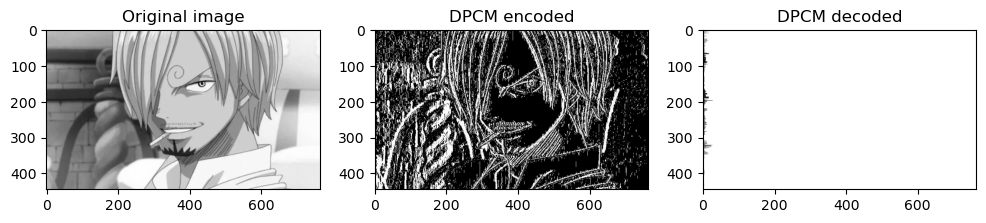

In [16]:
#Discrete cosine transform(DCT), DPCM
import cv2
import numpy as np
img=cv2.imread("D:\IMAGES\sanji.webp",0)
imf=np.float32(img)
dst=cv2.dct(imf,cv2.DCT_INVERSE)
img1=cv2.idct(dst)
img1=np.uint8(img)
cv2.imshow("Original image",img)
cv2.imshow("DCT",dst)
cv2.imshow("IDCT back image",img1)
cv2.waitKey(0)
cv2.destroyAllWindows()

#DPCM
import cv2
import matplotlib.pyplot as plt
import numpy as np
def dpcm_encode(image):
    """Encodes an image using DCM(Differential Pulse Code MOdulation)"""
    rows,cols=image.shape
    encoded=np.zeros((rows,cols),dtype=np.int16)
    
    for i in range(rows):
        for j in range(cols):
            if j==0:
                encoded[i,j]=image[i,j]
            else:
                encoded[i,j]=image[i,j]-image[i,j-1]
    return encoded

def dpcm_decode(encoded):
    """Decodes a DPCM-encoded image"""
    rows,cols=encoded.shape
    decoded=np.zeros((rows,cols),dtype=np.uint8)
    
    for i in range(rows):
        for j in range(cols):
            if j==0:
                decoded[i,j]=encoded[i,j]
            else:
                decoded[i,j]=np.clip(decoded[i,j-1]+encoded[i,j],0,255)
    return decoded

image=cv2.imread("D:\\IMAGES\\sanji.webp",cv2.IMREAD_GRAYSCALE)
en_img=dpcm_encode(image)
de_img=dpcm_decode(en_img)

plt.figure(figsize=(12,6))

plt.subplot(1,3,1)
plt.title("Original image")
plt.imshow(image,cmap='gray')

plt.subplot(1,3,2)
plt.title("DPCM encoded")
plt.imshow(en_img,cmap='gray')

plt.subplot(1,3,3)
plt.title("DPCM decoded")
plt.imshow(de_img,cmap='gray')

plt.show()              

In [ ]:
#Implementation of the image restoration technique- weiner filtering
import cv2
Ioriginal=imread("D:\IMAGES\panda.jpg")
imshow(Ioriginal)
title("Original Image")
PSF=fspecial("motion",21,11)
Idouble=im2double(Ioriginal)
blurred=imfilter(Idouble,PSF,"conv","circular")
imshow(blurred)
title("Blurred Image")

wnr1=deconvwnr(blurred,PSF)
imshow(wnr1)
title("Restored blurred image")
noise_mean=0
noise_var=0.0001
blurred_noisy=imnoise(blurred,"gaussian",noise_mean,noise_var)
imshow(blurrednoisy)
title("Blurred and noisy image")

wnr2=deconvwnr(blurred_noisy,PSF)
imshow(wnr2)
title("Restoration o blurred noisy image(NSR=0)")
signalvar=var(Idouble(:))
NSR=noise_var/signal_var

wnr3=deconvwnr(blurred_noisy,PSF,NSR)
imshow(wnr3)
title("Restoration of blurred noisy image(Estimated NSR)")
blurred_quantized=imfilter(Ioriginsl,PSF,"conv","circular")
imshow(blurred_quantized)
title("Blurred quantized image")

wnr4=deconvwnr(blurred_quantized,PSF)
imshow(wnr4)
title("Restoration o blurred quantized image(NSR=0)")

uniform_quantization_var=(1/256)^2/12
signal_var=var(Idouble(:))
NSR=uniform_quantization_var/signal_var
wnr5=econvwnr(blurred_quantized,PSF,NSR)
imshow(wnr5
title("Restoration o blurred quantized image(Estimated NSR)")

In [ ]:
#Huffman coding
import cv2
import numpy as np
import heapq
from collections import Counter
img=cv2.imread("D:\\IMAGES\\panda.jpg",cv2.IMREAD_GRAYSCALE)
freq=Counter(img.flatten())
heap=[[freq[pixel],pixel]for pixel in freq]
heapq.heapify(heap)
while len(heap)>1:
    left,right=heapq.heappop(heap),heapq.heappop(heap)
    heapq.heappush(heap,[left[0]+right[0],[left,right]])
    
huffman_codes={}
def generate_codes(node,code=""):
    if isinstance(node[1],list):
        generate_codes(node[1][0],code+"0")
        generate_codes(node[1][1],code+"1")
    else: 
        huffman_codes[node[1]]=code
generate_codes(heap[0])
encoded_img="".join(huffman_codes[p] for p in image.flatten())
reverse_map={v:k for k,v in huffman_codes.items()}
decoded_pixel,temp=[],""
for bit in encoded_image:
    temp+=bit
    if temp in reverse_map:
        decode_pixels.append(reverse_map[temp])
        temp=""
decoded_image=np.array(decoded_pixels,dtype=np.uint8).reshape(img.shape)        
cv2.imshow("Original",img)
cv2.imshow("Decoded",decoded_image)
cv2.waitKey(0)
cv2.destroyAllWindows()       

In [7]:
#Inverse filtering
import cv2
import numpy as np
import os

img=r"D:\\IMAGES\\panda.jpg"
img_bgr=cv2.imread(img)
for kernals in range(1,5):
    kernal_filename='blur_kernals/kernal'+str(kernals)+'_'+str(kernals)+'.png'
    h=cv2.imread(kernal_filename,0)
    for images in range(1,5):
        img_fn = 'blurry_images/blurry' + str(images) + '_' + str(kernals) + '.png'
        img_bgr=cv2.imread(img_fn)
        restored=np.zeros(img_bgr.shape)
        
        print(img_fn)
        print(kernal_filename)
        
        for i in range(0,3):
            g=img_bgr[:,:,i]
            G=(np.fft.fft2(g))
            h_padded=np.zeros(g.shape)
            h_padded[:h.shape[0],:h.shape[1]]=np.copy(h)
            H=(np.fft.fft2(h_padded))
            
            H_norm=H/abs(H.max())
            G_norm=G/abs(G.max())
            F_temp=G_norm/H_norm
            F_norm=F_temp/abs(F_temp.max())
            
            F_hat=F_norm*abs(G.max())
            f_hat=np.fft.ifft2(F_hat)
            restored[:,:,i]=abs(f_hat)
            
    out_fn='image_metrics/restored_'+str(images)+'_'+str(kernals)+'_1'+'.png'
    cv2.imwrite(out_fn,restored)

AttributeError: 'NoneType' object has no attribute 'shape'

In [32]:
# Erosion and dilation
import cv2
import numpy as np
import matplotlib.pyplot as plt
img=cv2.imread("D:\\IMAGES\\alpha.jpg")
gray_img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
thresh,bw_img=cv2.threshold(gray_img,150,255,cv2.THRESH_BINARY)
kernel=np.ones((3,3),np.uint8)
erod_img=cv2.dilate(bw_img,kernel,anchor=(0,0),iterations=3)
img_dilation=cv2.dilate(img,kernel,iterations=1)
cv2.imshow("Original image",gray_img)
cv2.namedWindow("Eroded image",cv2.WINDOW_NORMAL)
cv2.imshow("Eroded image",erod_img)
cv2.namedWindow("Dilated image",cv2.WINDOW_NORMAL)
cv2.imshow("Dilated image",img_dilation)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [5]:
import cv2
import numpy as np
import os

# Define the user-provided image path
image_path = r"D:\IMAGES\Gojo.jpg"

# Load the original image
img_bgr = cv2.imread(image_path)

# Apply Gaussian Blur to create a blurry image
kernel_size = (21, 21)  # Adjust size as needed
sigma = 5  # Standard deviation
gaussian_blur = cv2.GaussianBlur(img_bgr, kernel_size, sigma)
cv2.imwrite("D:\\IMAGES\\blurry_image.png", gaussian_blur)

# Generate a Gaussian blur kernel
kernel_1d = cv2.getGaussianKernel(ksize=kernel_size[0], sigma=sigma)
gaussian_kernel = kernel_1d * kernel_1d.T  # Convert to 2D
cv2.imwrite("D:\blur_kernel.png", gaussian_kernel * 255)  # Save kernel as an image

# Load the blur kernel
h = cv2.imread("D:\\IMAGES\\panda.jpg", 0)
if h is None:
    print("Error: Could not read blur kernel")
    exit()

# Resize kernel to match the input image dimensions
h_resized = cv2.resize(h, (img_bgr.shape[1], img_bgr.shape[0]))

# Initialize restored image
restored = np.zeros(img_bgr.shape)

for i in range(3):  # Loop through color channels
    g = img_bgr[:, :, i]
    G = np.fft.fft2(g)
    h_padded = np.zeros(g.shape)
    h_padded[:h_resized.shape[0], :h_resized.shape[1]] = np.copy(h_resized)
    H = np.fft.fft2(h_padded)
    
    H_norm = H / abs(H.max())
    G_norm = G / abs(G.max())
    F_temp = G_norm / H_norm
    F_norm = F_temp / abs(F_temp.max())

    F_hat = F_norm * abs(G.max())
    f_hat = np.fft.ifft2(F_hat)
    restored[:, :, i] = abs(f_hat)

# Save the restored output
output_path = "D:\\IMAGES\\restored_image.png"
cv2.imwrite(output_path, restored)
print(f" Restored image saved at {output_path}")

 Restored image saved at D:\IMAGES\restored_image.png


In [8]:
import cv2
import numpy as np
import os

# Input image
img_path = r"D:\\IMAGES\\panda.jpg"
img_bgr = cv2.imread(img_path)

# Check if the input image is loaded correctly
if img_bgr is None:
    raise FileNotFoundError(f"Error loading the input image: {img_path}")

# Processing kernel and blurry images
for kernels in range(1, 5):
    kernel_filename = f'blur_kernals/kernal{kernels}_{kernels}.png'
    h = cv2.imread(kernel_filename, 0)

    if h is None:
        print(f"Error loading kernel: {kernel_filename}")
        continue  # Skip if kernel image is missing

    for images in range(1, 5):
        img_fn = f'blurry_images/blurry{images}_{kernels}.png'
        img_bgr = cv2.imread(img_fn)

        if img_bgr is None:
            print(f"Error loading blurry image: {img_fn}")
            continue  # Skip if blurry image is missing

        restored = np.zeros(img_bgr.shape, dtype=np.uint8)

        print(f"Processing: {img_fn} with kernel: {kernel_filename}")

        for i in range(3):  # Processing each channel (B, G, R)
            g = img_bgr[:, :, i]
            G = np.fft.fft2(g)

            # Padding the kernel to match the image size
            h_padded = np.zeros(g.shape)
            h_padded[:h.shape[0], :h.shape[1]] = h
            H = np.fft.fft2(h_padded)

            # Normalizing the frequency domain
            H_norm = H / np.abs(H.max())
            G_norm = G / np.abs(G.max())

            # Inverse filtering (avoiding division by zero)
            with np.errstate(divide='ignore', invalid='ignore'):
                F_temp = np.where(np.abs(H_norm) != 0, G_norm / H_norm, 0)

            F_norm = F_temp / np.abs(F_temp.max()) if np.abs(F_temp.max()) != 0 else F_temp

            # Inverse FFT to get the restored image
            F_hat = F_norm * np.abs(G.max())
            f_hat = np.fft.ifft2(F_hat)
            restored[:, :, i] = np.clip(np.abs(f_hat), 0, 255).astype(np.uint8)

        # Saving the restored image
        out_fn = f'image_metrics/restored_{images}_{kernels}.png'
        cv2.imwrite(out_fn, restored)
        print(f"Restored image saved as: {out_fn}")


Error loading kernel: blur_kernals/kernal1_1.png
Error loading kernel: blur_kernals/kernal2_2.png
Error loading kernel: blur_kernals/kernal3_3.png
Error loading kernel: blur_kernals/kernal4_4.png
